In [ ]:
import tensorflow as tf
import numpy as np

x_input = np.array([[1,2,3,4,5]])
y_input = np.array([[10]])

x = tf.placeholder(tf.float32, [None, 5])
y = tf.placeholder(tf.float32, [None, 1])

print(x_input)
print(y_input)
print(x)
print(y)

In [ ]:
W = tf.Variable(tf.zeros([5, 1]))
b = tf.Variable(tf.zeros([1]))
y_pred = tf.matmul(x, W)+b

print(W)
print(b)

In [ ]:
# define a loss function
loss = tf.reduce_sum(tf.pow((y-y_pred), 2))

#specify the optimizer and the variable that we want to minimize
train = tf.train.GradientDescentOptimizer(0.0001).minimize(loss)

# initialize all variables
init = tf.global_variables_initializer()

In [ ]:

sess = tf.Session()
sess.run(init)
for i in range(10):
    feed_dict = {x: x_input, y: y_input}
    _, loss_value = sess.run([train, loss], feed_dict=feed_dict)
    print(loss_value)


In [ ]:
############################################################################################################################
############################################################################################################################
############################################################################################################################
############################################################################################################################
############################################################################################################################

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
import numpy as np
x_input = np.array([[1,2,3,4,5]])
y_input = np.array([[10]])



In [ ]:
model = Sequential()
model.add(Dense(units=32, input_dim=x_input.shape[1]))
model.add(Dense(units=1))

model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])

model.summary()


In [ ]:
history = model.fit(x_input, y_input, epochs=10, batch_size=32)

In [ ]:
pred = model.predict(x_input, batch_size=128)


In [ ]:
############################################################################################################################
############################################################################################################################
############################################################################################################################
############################################################################################################################
############################################################################################################################

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# We will be using the Iris Plants Database
from sklearn.datasets import load_iris

In [ ]:
# The first two classes (Iris-Setosa and Iris-Versicolour) are linear separable
iris = load_iris()
idxs = np.where(iris.target<2)
X = iris.data[idxs]
Y = iris.target[idxs]


In [ ]:
plt.scatter(X[Y==0][:,0],X[Y==0][:,2], color='green', label='Iris-Setosa')
plt.scatter(X[Y==1][:,0],X[Y==1][:,2], color='red', label='Iris-Versicolour')
plt.title('Iris Plants Database')
plt.xlabel('sepal length in cm')
plt.ylabel('sepal width in cm')
plt.legend()
plt.show()

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
weights = np.random.normal(size=X_train.shape[1])
bias = 1

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

In [ ]:
#define the hyperparameters
learning_rate = 0.1
n_epochs = 15


del_w = np.zeros(weights.shape)
hist_loss = []
hist_accuracy = []
for i in range(n_epochs):
    # We apply a simple step function, if the output is > 0.5 we predict 1, else 0
    output = np.where((X_train.dot(weights)+bias)>0.5, 1, 0)
    
    # Compute MSE
    error = np.mean((y_train-output)**2)
 
    # Update weights and bias
    weights -= learning_rate * np.dot((output-y_train), X_train)
    bias += learning_rate * np.sum(np.dot((output-y_train), X_train))
    
    # Calculate MSE
    loss = np.mean((output - y_train) ** 2)
    hist_loss.append(loss)
    
    # Determine validation accuracy
    output_val = np.where(X_val.dot(weights)>0.5, 1, 0)
    accuracy = np.mean(np.where(y_val==output_val, 1, 0))
    hist_accuracy.append(accuracy)

In [ ]:
fig = plt.figure(figsize=(8, 4))

a = fig.add_subplot(1,2,1)
imgplot = plt.plot(hist_loss)
plt.xlabel('epochs')
a.set_title('Training loss')


a=fig.add_subplot(1,2,2)
imgplot = plt.plot(hist_accuracy)
plt.xlabel('epochs')
a.set_title('Validation Accuracy')
plt.show()


In [ ]:
############################################################################################################################
############################################################################################################################
############################################################################################################################
############################################################################################################################
############################################################################################################################

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# We will be using make_circles from scikit-learn
from sklearn.datasets import make_circles


In [ ]:
# We create an inner and outer circle
X, y = make_circles(n_samples=500, factor=.3, noise=.05, random_state=2017)
outer = y == 0
inner = y == 1


In [ ]:
plt.title("Two Circles")
plt.plot(X[outer, 0], X[outer, 1], "ro")
plt.plot(X[inner, 0], X[inner, 1], "bo")
plt.show()

In [ ]:
# We normalize the data to make sure the center of both circles is (1,1):
X = X+1

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# A linear activation function won't work in this case, so we'll be using a sigmoid function:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# hyperparameters:
n_hidden = 50 # number of hidden units
n_epochs = 1000
learning_rate = 1


In [ ]:
# Initialize the weights and other variables:

weights_hidden = np.random.normal(0.0, size=(X_train.shape[1], n_hidden))
weights_output = np.random.normal(0.0, size=(n_hidden))

hist_loss = []
hist_accuracy = []

In [ ]:
for e in range(n_epochs):
    
    del_w_hidden = np.zeros(weights_hidden.shape)
    del_w_output = np.zeros(weights_output.shape)
    
    # Loop through training data in batches of 1
    for x_, y_ in zip(X_train, y_train):
        
        # Forward computations
        hidden_input = np.dot(x_, weights_hidden)
        hidden_output = sigmoid(hidden_input)
        output = sigmoid(np.dot(hidden_output, weights_output))
        
        # Backward computations
        error = y_ - output
        output_error = error * output * (1 - output)
        hidden_error = np.dot(output_error, weights_output) * hidden_output * (1 - hidden_output)
        del_w_output += output_error * hidden_output
        del_w_hidden += hidden_error * x_[:, None]
        
        # Update weights
        weights_hidden += learning_rate * del_w_hidden / X_train.shape[0]
        weights_output += learning_rate * del_w_output / X_train.shape[0]
        
    # Print stats (validation loss and accuracy)
    if e % 100 == 0:
        hidden_output = sigmoid(np.dot(X_val, weights_hidden))
        out = sigmoid(np.dot(hidden_output, weights_output))
        loss = np.mean((out - y_val) ** 2)
        # Final prediction is based on a threshold of 0.5
        predictions = out > 0.5
        accuracy = np.mean(predictions == y_val)
        print("Epoch: ", '{:>4}'.format(e),"; Validation loss: ", '{:>6}'.format(loss.round(4)), "; Validation accuracy: ", '{:>6}'.format(accuracy.round(4)))

In [ ]:
############################################################################################################################
############################################################################################################################
############################################################################################################################
############################################################################################################################
############################################################################################################################

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('winequality-red.csv', sep=';')
y = data['quality']
X = data.drop(['quality'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [ ]:
print('Average quality training set: {:.4f}'.format(y_train.mean()))
X_train.head()

In [ ]:
# normalize the input data:
scalar = StandardScaler().fit(X_train)

X_train = pd.DataFrame(scalar.transform(X_train))
X_test = pd.DataFrame(scalar.transform(X_test))


In [ ]:
# Predict the mean quality of the training data for each validation input
print('MSE:', np.mean((y_test - ([y_train.mean()] * y_test.shape[0]))))

In [ ]:
model = Sequential()
model.add(Dense(200, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer=Adam(), metrics=['accuracy'])

# callback for early stopping and saving the best model:
callbacks= [EarlyStopping(monitor='val_acc', patience=20, verbose=1),
            ModelCheckpoint('checkpoints/multi_layer_best_mode')]

In [ ]:
batch_size=64
n_epochs=5000
model.fit(X_train.values, y_train, batch_size=batch_size, 
          epochs=n_epochs, verbose=2, callbacks=callbacks)

In [ ]:
best_model = model
best_model.load_weights('checkpoints/multi_layer_best_mode')
best_model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

# Evaluate on the test set
score=best_model.evaluate(X_test.values, y_test, verbose=0)
print('Test accuracy: %.2f%%' % (score[1]*100))

In [ ]:
############################################################################################################################
############################################################################################################################
############################################################################################################################
############################################################################################################################
############################################################################################################################

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import Callback
from keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_val, y_val) = mnist.load_data()

In [ ]:
# Show an example of each label and print the count per label:
unique_lables = set(y_train)
plt.figure(figsize=(12,12))
print(unique_lables)

i=1
for label in unique_lables:
    image = X_train[y_train.tolist().index(label)]
    plt.subplot(10,10,i)
    plt.axis('off')
    plt.title("{0}: ({1})".format(label, y_train.tolist().count(label)))
    i +=1
    _ = plt.imshow(image, cmap='gray')
plt.show()

In [ ]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
np.random.seed(1671) # for reproducibility

# network and training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # number of outputs = number of digits
OPTIMIZER = SGD() # optimizer, explained later in this chapter
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.3


# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
RESHAPED = 784

X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

# M_HIDDEN hidden layers
# 10 outputs
# final stage is softmax
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))

model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))

model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])


In [ ]:
# save as JSON json_string = model.to_json()
# save as YAML yaml_string = model.to_yaml()
# model reconstruction from JSON: from keras.models import model_from_json model = model_from_json(json_string)

from keras.models import load_model 
model.save('my_model.h5')
load_model('my_model.h5')

In [ ]:
############################################################################################################################
############################################################################################################################
############################################################################################################################
############################################################################################################################
############################################################################################################################

In [ ]:
from __future__ import division, print_function
from keras.callbacks import ModelCheckpoint
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.utils import np_utils
import numpy as np
import os
BATCH_SIZE = 128
NUM_EPOCHS = 2
MODEL_DIR = "/tmp"
(Xtrain, ytrain), (Xtest, ytest) = mnist.load_data()
Xtrain = Xtrain.reshape(60000, 784).astype("float32") / 255
Xtest = Xtest.reshape(10000, 784).astype("float32") / 255
Ytrain = np_utils.to_categorical(ytrain, 10)
Ytest = np_utils.to_categorical(ytest, 10)
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)
model = Sequential()
model.add(Dense(512, input_shape=(784,), activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10, activation="softmax"))
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
# save best model
checkpoint = ModelCheckpoint(filepath=os.path.join(MODEL_DIR, "model-{epoch:02d}.h5"),  save_best_only=True)
model.fit(Xtrain, Ytrain, batch_size=BATCH_SIZE, nb_epoch=NUM_EPOCHS, validation_split=0.1, callbacks=[checkpoint])

In [ ]:
from quiver_engine import server
server.launch(model)

In [ ]:
############################################################################################################################
############################################################################################################################
############################################################################################################################
############################################################################################################################
############################################################################################################################

In [2]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt


In [3]:
# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
#constant
BATCH_SIZE = 128
NB_EPOCH = 5
NB_CLASSES = 10


#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [4]:
#one-hot encoding and normalize the images
X_train = X_train.astype('float32') /255
X_test = X_test.astype('float32') /255

y_train = np_utils.to_categorical(y_train, NB_CLASSES)
y_test = np_utils.to_categorical(y_test, NB_CLASSES)


In [5]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', input_shape=(32,32,3), activation='relu'))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [13]:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
history_object = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, validation_split=0.2, verbose=1)
score= model.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=1)

print("Test score: ", score[0])
print("Test accuracy: ", score[1])

Train on 40000 samples, validate on 10000 samples
Epoch 1/3
40000/40000 [==============================] - 347s 9ms/step - loss: 1.7946 - acc: 0.3526 - val_loss: 1.3981 - val_acc: 0.5009
Epoch 2/3
40000/40000 [==============================] - 346s 9ms/step - loss: 1.3533 - acc: 0.5184 - val_loss: 1.1310 - val_acc: 0.5923
Epoch 3/3
10000/10000 [==============================] - 28s 3ms/step
Test score:  0.996041975689
Test accuracy:  0.6484


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


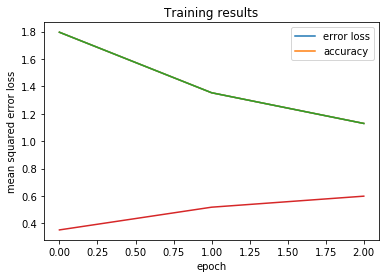

In [18]:
from keras.models import Model
import matplotlib.pyplot as plt

### print the keys contained in the history object
print(history_object.history.keys())

### plot the training and validation loss for each epoch
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['acc'])
plt.title('Training results')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['error loss', 'accuracy'], loc='upper right')
plt.show()

In [7]:
from keras.preprocessing.image import ImageDataGenerator
from IPython.display import display 
from PIL import Image

print("Augmenting training set images...")
datagen = ImageDataGenerator( rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
                              zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

xtas, ytas = [], []
for i in range(X_train.shape[0]):
    num_aug=0
    x = X_train[i] # (3, 32, 32)
    x = x.reshape((1,) + x.shape) # (1, 3, 32, 32)
    for x_aug in datagen.flow(x, batch_size=1, save_to_dir='preview', save_prefix='cifar', save_format='jpeg'):
        if num_aug >= 5 :
            break
        xtas.append(x_aug[0])
    num_aug += 1

Augmenting training set images...


KeyboardInterrupt: 

In [17]:
import numpy as np
import scipy.misc
from keras.models import model_from_json
from keras.optimizers import SGD

model = model_from_json(open('cifar10_architecture.json').read())
model.load_weights('cifar10_weights.h5')

img_names = ['preview/cifar_0_9794.jpeg', 'preview/cifar_0_9.jpeg']
imgs = [np.transpose(scipy.misc.imresize(scipy.misc.imread(img_name), (32, 32)), (1, 0, 2)).astype('float32') for img_name in img_names]
imgs = np.array(imgs) / 255


In [19]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])
predictions = model.predict_classes(imgs)
print(predictions)


2/2 [==============================] - 0s 65ms/step
[3 6]


In [ ]:
############################################################################################################################
############################################################################################################################
############################################################################################################################
############################################################################################################################
############################################################################################################################

(224, 224, 3)
(1, 224, 224, 3)


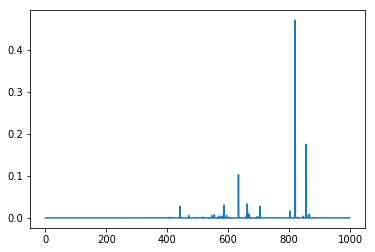

820


In [23]:
from keras.models import Model
from keras.preprocessing import image
from keras.optimizers import SGD
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
import numpy as np
import cv2

# prebuild model with pre-trained weights on imagenet
model = VGG16(weights='imagenet', include_top=True)
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy')

# resize into VGG16 trained images' format
im = cv2.resize(cv2.imread('steam-locomotive.jpg'), (224, 224))  # (224, 224, 3)
im = np.expand_dims(im, axis=0)  # (1, 224, 224, 3)

# predict
out = model.predict(im)
plt.plot(out.ravel())
plt.show()
print (np.argmax(out))
#this should print 820 for steaming train